# Calcul numérique avec NumPy

Manipulation des arrays et des fonctions de NumPy, la librairie de
référence pour le calcul numérique.

En tant que statisticien, on est fréquemment amené à manipuler des
séries de valeurs numériques, à partir desquelles on réalise diverses
opérations mathématiques, des plus usuelles (moyenne, variance, etc.)
aux plus complexes. On peut, comme on l’a fait dans les précédents
tutoriels, utiliser les objets fondamentaux de Python, et en particulier
les listes, pour réaliser de telles opérations. En pratique, on
préférera utiliser la **librairie de référence pour le calcul
scientifique**, `NumPy`, qui fournit à la fois des objets (les
***arrays***) et des fonctions qui vont grandement nous simplifier la
vie pour effectuer tous nos calculs en Python de manière efficiente.

## NumPy

On commence par importer la librairie `NumPy`. Comme expliqué dans un
précédent tutoriel, l’usage est courant est de lui attribuer l’alias
`np`.

In [1]:
import numpy as np

### Pourquoi utiliser NumPy ?

Plutôt que de présenter de manière abstraite les avantages de `NumPy`,
illustrons ces derniers à travers un exemple simple : la multiplication
terme à terme de deux vecteurs.

On génère deux vecteurs contenant les entiers allant de $0$ à $99999$,
que l’on multiplie terme à terme. On effectue cela d’abord via les
listes Python (fonction `mult_list`), puis à l’aide de `NumPy` (fonction
`mult_np`), et on compare les performances des deux méthodes.

In [2]:
def mult_list(n):
    a = range(n)
    b = range(n)

    c = []
    for i in range(len(a)):
        mult = a[i] * b[i]
        c.append(mult)
        
    return c

def mult_np(n):
    a_np = np.arange(n)
    b_np = np.arange(n)
    
    c_np = a_np * b_np

    return c_np

In [3]:
n = 100000

In [4]:
# Vérification de la cohérence sur les 10 premiers éléments
print(mult_list(n)[:10])
print(mult_np(n)[:10])

In [5]:
%%timeit -n10

mult_list(n)  # Performance de la méthode liste

In [6]:
%%timeit -n10

mult_np(n)  # Performance de la méthode NumPy

Cet exemple illustre à lui seul les principaux avantages de `NumPy` pour
le calcul scientifique : - les calculs sont **vectorisés** : multiplier
deux *arrays* va naturellement effectuer la multiplication terme à
terme, contrairement aux listes qui ne permettent pas cette opération.
Les personnes travaillant avec `R` retrouveront là une propriété
familière et bien pratique. - conséquence de la vectorisation, **la
syntaxe est plus légère et plus claire** : on voit directement
l’opération qui est effectuée et on limite ainsi les risques d’erreur
; - les calculs sont automatiquement **optimisés** par `NumPy` (via
l’appel à du code `C` pré-compilé), réduisant très largement le temps
mis par les opérations mathématiques (divisé par un facteur 10 dans
notre exemple).

### Les *array* NumPy

#### Définition

Toute la librairie `NumPy` est basée sur un objet fondamental :
l’*array*. Un *array* est un objet qui contient une séquence de données,
et présente deux caractéristiques principales : - les données contenues
dans un *array* doivent être de **type homogène**, là où une même liste
peut contenir des objets de différente nature ; - un *array* a une
**taille fixée** à sa création, là où une liste peut grandir
dynamiquement (en ajoutant des éléments via la méthode `append` par
exemple).

Ce sont en grande partie ces deux contraintes qui rendent possible les
gains de performance et la syntaxe lisible qu’offre `NumPy`.

#### Création

Il existe différentes manières de créer un *array*. La plus standard est
de convertir une liste en *array* via la fonction *array* de `NumPy`.

In [7]:
l = [1, 2, 3]
a = np.array(l)
print(a)

A première vue, la fonction `print` renvoie une représentation identique
à celle d’une liste. Vérifions le type de notre objet.

In [8]:
type(a)

L’objet est de type `ndarray`, qui est le type standard correspondant à
un *array* `NumPy`.

On a vu qu’un *array* avait pour propriété de contenir des données de
type homogène ; en l’occurrence, des entiers. On peut vérifier le type
des données contenues via l’attribut `dtype` d’un *array*.

In [9]:
a.dtype

Même si `NumPy` est avant tout une librairie dédiée au calcul numérique,
il reste tout à fait possible de définir des `arrays` contenant des
chaînes de caractères.

In [10]:
b = np.array(['1', 'tigre'])
b.dtype

Le `dtype` par défaut des `arrays` contenant des chaînes de caractères
est un peu particulier, mais cela n’a pas d’importance en pratique.
Retenez simplement sa forme.

Enfin, question importante : que se passe-t-il si l’on essaie de définir
un *array* contenant des objets de types hétérogènes ?

In [11]:
c = np.array([1, 2, '3'])
print(c)
print(c.dtype)

Réponse : tous les objets sont convertis en chaîne de caractères par
défaut.

#### Dimension

Les *array* correspondent en fait à des tableaux de données, c’est à
dire qu’ils peuvent être uni- ou multi-dimensionnels. Un *array* de
dimension 1 ressemble à un vecteur (ou une liste), un *array* de
dimension 2 ressemble à une matrice, et ainsi de suite.

On peut afficher le nombre de dimensions d’un *array* via l’attribut
`ndim`.

In [12]:
c = np.array([1, 2, '3'])
c.ndim

De la même manière que l’on a créé un *array* de dimension 1 à partir
d’une liste simple, on peut créer un *array* multi-dimensionnel à partir
d’une liste de listes.

In [13]:
d = np.array([[1, 2, 3], [4, 5, 6]])
print(d)

On a converti une liste contenant 2 sous-listes à 3 éléments chacune, ce
qui donne un *array* à deux dimensions. Notons que l’appel de `print`
affiche une matrice à deux lignes et trois colonnes.

In [14]:
d.ndim

On a bien affaire à un *array* à deux dimensions. Mais en pratique,
lorsqu’on manipule des `arrays` multidimensionnels, on a aussi envie de
connaître la *taille* de chacune des dimensions. En dimension 2, c’est
le nombre de lignes et de colonnes. Pour cela, on utilise la méthode
`shape`, qui renvoie un *tuple* contenant les tailles des différentes
dimensions.

In [15]:
d.shape

Le premier chiffre donne le nombre de lignes, le second le nombre de
colonnes. On reviendra par la suite sur l’ordre des dimensions à travers
la notion d’*axis*.

#### Indexation

On accède aux différents éléments d’un *array* de dimension 1 exactement
de la même manière que ceux d’une liste.

In [16]:
a = np.array([1, 2, 3, 4, 5, 6])

print(a)
print()
print(a[1])
print()
print(a[2:5])
print()
print(a[-2])

Pour un *array* multidimensionnel, il faut spécifier le ou les éléments
voulus sur chacune des dimensions de l’*array*, en les séparant par des
virgules.

In [17]:
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

print(b)
print()
print(b[1, 3])
print()
print(b[1:3, 1:3])

Pour accéder à une ligne complète, on peut utiliser `:` sur la dimension
des colonnes pour spécifier : “toutes les colonnes”. Et inversement pour
récupérer une colonne complète.

In [18]:
print(b[1,:])
print()
print(b[:,2])

#### Modification d’éléments

Les éléments d’un *array* peuvent être modifiés. On combine pour cela la
syntaxe d’indexation vue précédemment avec l’opérateur d’assignation
`=`.

In [19]:
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

b[1, 1] = 18
print(b)

On peut également modifier des séries de nombres, voire des
lignes/colonnes complètes, à condition d’assigner un élément de même
taille.

In [20]:
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

b[:, 2] = [-1, -1, -1]
b

Contrairement aux listes, on ne va généralement pas ajouter ou supprimer
d’éléments à un *array*. La raison est que, comme indiqué précédemment,
la taille d’un *array* est fixée à sa construction.

Si l’on souhaite faire grandir un *array*, on va généralement le faire à
partir d’une liste – qui elle peut grandir – que l’on convertit ensuite
en *array*.

Si l’on souhaite supprimer des éléments d’un *array*, on peut utiliser
la syntaxe d’indexation étudiée dans la section précédente pour
récupérer le sous-*array* qui nous intéresse, et assigner ce dernier à
une nouvelle variable.

#### Masques booléens

Un gros avantage des *arrays* `NumPy` par rapport aux listes est qu’ils
supportent les **masques booléens**, c’est à dire qu’on peut
sélectionner des éléments d’un *array* en lui passant un *array* de même
taille contenant des booléens.

In [21]:
a = np.array([1, 2, 3])
a[[True, True, False]]

Cette propriété ouvre de nombreuses possibilités, dans la mesure où elle
peut être combinée avec la propriété de vectorisation des *arrays*. Il
devient ainsi très facile de **sélectionner des éléments selon des
conditions**, même pour les *arrays* multidimensionnels.

In [22]:
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
cond = (b > 6) & (b != 10)

print(cond)
print()
print(b[cond])

Et l’on peut bien entendu exploiter ce mécanisme pour modifier des
éléments selon une condition.

In [23]:
b[cond] = -1
print(b)

Ce dernier exemple illustre par ailleurs une propriété importante en
`NumPy` appelée ***broadcasting*** : lorsque l’on remplace plusieurs
éléments d’un *array* par un élément de taille 1 (et non un *array* de
même taille), tous les éléments sont remplacés par cette valeur.

### Opérations mathématiques

#### Arithmétique sur les *arrays*

Tout au début de ce tutoriel, nous avons vu que multiplier deux *arrays*
via l’opérateur `*` effectuait une multiplication termes à termes des
deux *arrays*, et ce de manière vectorisée. Les opérations élémentaires
(`+`, `-`, `*` et `/`) s’appliquent de la même manière aux *arrays*
multidimensionnels.

In [24]:
a = np.array([[1, 2, 2], [2, 2, 1]])
b = np.array([[3, 3, 1], [1, 3, 3]])

a * b

Notons qu’on retrouve la propriété de *broadcasting* discutée dans la
section précédente : lorsque l’on effectue une opération entre un
*array* et un nombre de taille 1, l’opération est appliquée à chaque
terme de l’*array*.

In [25]:
a * 4

#### Algèbre linéaire

`NumPy` permet de réaliser simplement et de manière efficiente des
opérations d’algèbre linéaire sur les *arrays*. L’ensemble des fonctions
disponibles sont présentées dans la [documentation
officielle](https://numpy.org/doc/stable/reference/routines.linalg.html)
(en Anglais).

Par exemple, l’opérateur `@` permet de réaliser une multiplication
matricielle (et non plus termes à termes comme le fait `*`).

In [26]:
a = np.array([[1, 2, 3], [3, 2, 1]])
b = np.array([[2, 3], [1, 3], [3, 1]])

a @ b

#### Fonctions mathématiques

`NumPy` offre pléthore de fonctions
[mathématiques](https://numpy.org/doc/stable/reference/routines.math.html)
et
[statistiques](https://numpy.org/doc/stable/reference/routines.statistics.html),
comme `sum`, `mean`, `min`, `round`, `log`, etc. Leur application à des
objets unidimensionnels ne pose pas de problème particulier.

In [27]:
print(np.log(12))
print()
print(np.min([1, 2, 3]))
print()
print(np.mean([1, 2, 3]))

En revanche, dans le cas multidimensionnel, leur utilisation devient un
peu plus subtile car on peut vouloir réaliser l’agrégation selon
différentes dimensions. Si l’on ne spécifie rien, l’agrégation est
effectuée sur tous les éléments de l’*array*.

In [28]:
a = np.array([[1, 2, 2], [2, 2, 1]])

np.sum(a)

Mais comment faire si l’on veut sommer par ligne ? Ou bien par colonne ?
C’est là qu’intervient un élément crucial et assez complexe des
fonctions de `NumPy` : le paramètre `axis`, qui spécifie la dimension
selon laquelle est effectuée l’opération.

Lorsqu’il n’est pas spécifié comme dans l’exemple précédent, il prend la
valeur `None` par défaut.

In [29]:
a = np.array([[1, 2, 2], [2, 2, 1]])

np.sum(a, axis=None)  # idem que np.sum(a)

La figure suivante permet de bien se représenter la manière dont
fonctionnent les axes avec `NumPy`, afin de bien spécifier le sens
attendu de l’agrégation.

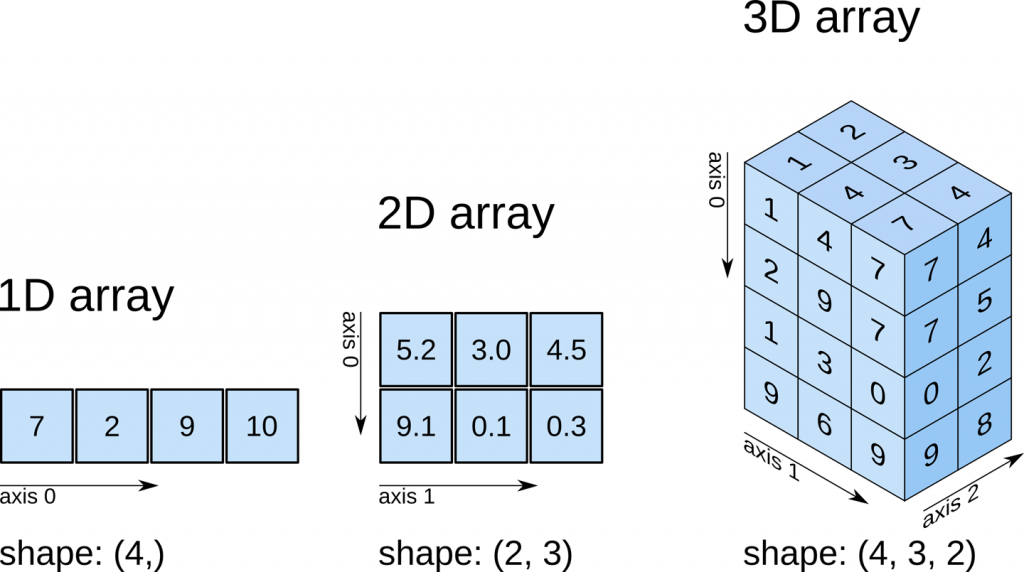

Ainsi, si l’on souhaite calculer la somme de chaque colonne par exemple,
il faut agréger selon l’axe $0$.

In [30]:
a = np.array([[1, 2, 2], [2, 2, 1]])

np.sum(a, axis=0)

Et inversement pour obtenir les sommes de chaque ligne.

In [31]:
np.sum(a, axis=1)

Enfin, notons que les fonctions mathématiques qui réalisent une
agrégation sont généralement également disponibles comme *méthodes* d’un
*array*. Elles fonctionnent de la même manière, au détail près qu’elles
ne prennent pas l’*array* en argument dans la mesure où elles sont déjà
“attachées” à celui-ci.

In [32]:
a.sum(axis=1)

### Conclusion

`NumPy` est la librairie quasi-standard de calcul scientifique en
Python. Elle est à privilégier dès lors que vous souhaitez effectuer des
opérations sur des données numériques, *a fortiori* lorsqu’il s’agit
d’opérations vectorisées et/ou mobilisant des objets multidimensionnels
comme des matrices.

Les possibilités offertes par `NumPy` sont gigantesques, et nous n’en
avons vu qu’un aperçu. La [documentation
officielle](https://numpy.org/doc/stable/user/) présente l’ensemble de
ces possibilités. Cette [*cheat
sheet*](http://datacamp-community-prod.s3.amazonaws.com/ba1fe95a-8b70-4d2f-95b0-bc954e9071b0)
peut également s’avérer utile en cas d’oubli. Nous verrons également des
fonctions supplémentaires à travers les exercices de fin de chapitre.

## Exercices

### Questions de compréhension

-   1/ Quels sont les principaux avantages de `NumPy` ?
-   2/ Quelles sont les deux caractéristiques principales d’un *array*
    `NumPy` ?
-   3/ Que se passe-t-il si l’on essaie de définir un *array* contenant
    des objets de types hétérogènes ?
-   4/ Quelle est la principale méthode pour créer un *array* ?
-   5/ Quelles informations contient l’attribut `shape` d’un array ?
-   6/ Peut-on ajouter un élément à un *array* ? Supprimer un élément ?
-   7/ Qu’est-ce qu’un masque booléen et à quoi cela sert-il ?
-   8/ Qu’est-ce que la propriété de *broadcasting* ?
-   9/ A quoi sert le paramètre `axis` des fonctions mathématiques de
    `NumPy` ?

\`\`\`mvyepnoe tags=\[\] \# Testez votre réponse dans cette cellule


    ```{python} tags=[]
    # Exécuter cette cellule pour afficher la solution
    %load -r 3-32 solutions.py

### Exercice : sélectionner des éléments dans un vecteur

Un vecteur comprenant les entiers compris entre 10 et 20 est défini dans
la cellule suivante. En utilisant l’indexation des *arrays* `NumPy` : -
sélectionner les éléments aux positions 1, 3 et 4 - sélectionner tous
les éléments sauf le premier - sélectionner tous les éléments sauf le
premier et le dernier - sélectionner les 3 premiers éléments -
sélectionner les 5 derniers éléments - sélectionner tous les éléments
pairs - sélectionner tous les éléments en les triant dans l’ordre
inverse (NB : la fonction `np.flip` permet de faire la même chose)

\`\`\`mvyepnoe tags=\[\] X = np.arange(10, 21)

print(X)


    ```{python} tags=[]
    # Testez votre réponse dans cette cellule

`mvyepnoe tags=[] # Exécuter cette cellule pour afficher la solution %load -r 36-44 solutions.py`

### Exercice : sélectionner des éléments dans une matrice

Une matrice de taille 5x5 comprenant tous les entiers compris entre 0 et
24 est définie dans la cellule suivante. En utilisant l’indexation des
*arrays* `NumPy` : - sélectionner la valeur $19$ - sélectionner la 2ème
ligne - sélectionner la 4ème colonne - sélectionner la sous-matrice 3x3
centrale - sélectionner les éléments diagonaux (NB : la fonction
`np.diag` permet de réaliser la même opération de manière beaucoup plus
simple)

In [33]:
Y = np.arange(0, 25).reshape((5, 5))

print(Y)

\`\`\`mvyepnoe tags=\[\] \# Testez votre réponse dans cette cellule


    ```{python} tags=[]
    # Exécuter cette cellule pour afficher la solution
    %load -r 48-54 solutions.py

### Exercice : un peu de calcul

Deux matrices carrées de taille 3x3 sont définies sous forme d’*arrays*
`NumPy` dans la cellule suivante. A partir de ces matrices, réaliser les
opérations mathématiques suivantes : - multiplier tous les éléments de
`X` par 3 - diviser les éléments de `Y` par ceux de `X` - passer tous
les éléments de `Y` au `log` - passer tous les éléments de `X` au
carré - faire une multiplication matricielle de `X` et `Y` - transposer
la matrice `Y`

NB : vous pourrez trouver les fonctions nécessaires dans la
[documentation](https://numpy.org/doc/stable/reference/routines.math.html)
ou via un moteur de recherche.

In [34]:
X = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

Y = np.array([[10,11,12],
              [13,14,15],
              [16,17,18]])

\`\`\`mvyepnoe tags=\[\] \# Testez votre réponse dans cette cellule


    ```{python} tags=[]
    # Exécuter cette cellule pour afficher la solution
    %load -r 58-76 solutions.py

### Exercice : initialisation d’*arrays* de diverses natures

Dans le tutoriel, nous avons vu que la méthode standard pour créer un
*array* `NumPy` consistait à initialiser une liste, que l’on convertit
ensuite en *array*. On peut également utiliser des fonctions natives de
`NumPy` qui créent des *array* d’une taille donnée, contenant des
valeurs basiques (ex : valeurs “quasi-vides”, zéros, uns, une valeur
spécifiée par l’utilisateur, etc.).

Par exemple, pour créer une matrice à 3 lignes et deux colonnes
contenant des zéros, la syntaxe est :

In [35]:
np.zeros((3, 2))

En vous référant à la
[documentation](https://numpy.org/doc/stable/reference/routines.array-creation.html)
de ces fonctions, générer :

-   un vecteur (array à 1 dimension), contenant 18 fois la valeur $1$
    (fonction `np.ones`)
-   un array à 3 dimensions, respectivement de tailles 2, 3 et 5,
    contenant uniquement des zéros (fonction `np.zeros`)
-   une matrice (array à 2 dimensions), à 4 lignes et 3 colonnes,
    contenant uniquement la valeur 5 (fonction `np.full`)
-   une matrice identité de taille 5, i.e. une matrice à 5 lignes et 5
    colonnes, contenant des $1$ sur sa diagonale et des $0$ partout
    ailleurs (fonction `np.eye`)
-   un vecteur contenant les entiers compris entre $0$ à $99$ inclus
    (fonction `np.arange`)
-   un vecteur contenant les entiers *pairs* compris entre $0$ à $99$
    inclus (fonction `np.arange`)
-   un vecteur contenant 5 valeurs uniformément espacées entre $2$ et
    $3$ inclus (fonction `np.linspace`)

\`\`\`mvyepnoe tags=\[\] \# Testez votre réponse dans cette cellule


    ```{python} tags=[]
    # Exécuter cette cellule pour afficher la solution
    %load -r 80-106 solutions.py

### Exercice : tirage d’un vecteur selon une loi normale

En vous référant à la
[documentation](https://numpy.org/doc/stable/reference/random/generator.html)
des fonctions de génération de nombres aléatoires de `NumPy`, générer un
vecteur `X` de taille 10000, contenant des nombres tirés selon une loi
normale de moyenne 0 et de variance 2.

Vérifiez ensuite à l’aide des fonctions mathématiques de `NumPy` que la
moyenne et la variance de votre échantillon sont cohérents par rapport
aux valeurs attendues.

Indice : attention à la manière dont est spécifiée la variance dans la
fonction `NumPy` de génération d’une loi normale.

\`\`\`mvyepnoe tags=\[\] \# Testez votre réponse dans cette cellule


    ```{python} tags=[]
    # Exécuter cette cellule pour afficher la solution
    %load -r 110-112 solutions.py

### Exercice : tirage d’une matrice selon une loi uniforme

En vous référant à la
[documentation](https://numpy.org/doc/stable/reference/random/generator.html)
des fonctions de génération de nombres aléatoires de `NumPy`, générer
une matrice `U` de taille 1000 par 1000, contenant des nombres tirés
selon une loi uniforme dans l’intervalle \[-1, 1\].

En utilisant la fonction `np.all` et un test booléen, vérifier que tous
les nombres contenus dans `U` sont bien compris entre -1 et 1.

\`\`\`mvyepnoe tags=\[\] \# Testez votre réponse dans cette cellule


    ```{python} tags=[]
    # Exécuter cette cellule pour afficher la solution
    %load -r 116-119 solutions.py

### Exercice : binariser une matrice de nombres

On peut parfois avoir besoin de binariser une matrice numérique, c’est à
dire de fixer un seuil au delà duquel les valeurs numériques sont fixées
à 1, et à 0 en-dessous. `NumPy` propose plusieurs méthodes pour réaliser
une telle opération, nous allons en voir deux.

Dans la cellule suivante, une matrice `X` à 6 lignes et 6 colonnes est
générée, qui comprend des entiers aléatoirement choisis entre 0 et 49.
Vous devez binariser cette matrice de deux manières différentes **sans
l’écraser** (i.e. la matrice binaire doit être assignée à une autre
variable que `X` et `X` ne doit pas être modifiée) : - première méthode
: en utilisant la fonction `np.zeros` et les masques booléens - seconde
méthode : en utilisant la fonction `np.where`
(cf. [doc](https://numpy.org/doc/stable/reference/generated/numpy.where.html))

In [36]:
X = np.random.randint(0, 50, size=(6, 6))

\`\`\`mvyepnoe tags=\[\] \# Testez votre réponse dans cette cellule


    ```{python} tags=[]
    # Exécuter cette cellule pour afficher la solution
    %load -r 123-136 solutions.py

### Exercice : touché-coulé

L’objectif de cet exercice est de programmer seulement à l’aide d’objets
et de fonctions de `NumPy` un touché-coulé très basique.

Une grille de 5x5 est définie dans la cellule suivante comme un *array*,
les valeurs $1$ symbolisant la présence d’un bateau. Vous devez
programmer une fonction `shoot` qui : - prend en input une coordonnée
$x$ (indice de la ligne) et une cordonnée $y$ (indice de la colonne) -
teste si au moins une valeur $1$ est présente dans la grille : - si oui
: - s’il y a un bateau à l’adresse (x, y), remplacer la valeur $1$ par
$2$ et `print` “Touché !” - sinon, `print` “Raté !” - si non : - `print`
“Fin de partie !”

Puis réalisez quelques tests pour vous assurer que votre fonction marche
comme attendu.

In [37]:
X = np.array([[1, 1, 1, 0, 0], [0, 0, 0, 0, 1], [1, 0, 0, 0, 1],
              [1, 0, 0, 0, 0], [0, 1, 1, 1, 1]])
print(X)

\`\`\`mvyepnoe tags=\[\] \# Testez votre réponse dans cette cellule


    ```{python} tags=[]
    # Exécuter cette cellule pour afficher la solution
    %load -r 140-157 solutions.py

### Exercice : One Hot Encoding

En statistique, il est fréquent de vouloir encoder numériquement un
vecteur de catégories. Une manière fréquente d’encoder des catégories
est le *one hot encoding* (OHE) : chaque valeur est représentée par un
vecteur binaire, qui contient un $1$ sur la colonne correspondant à la
catégorie et des $0$ partout ailleurs.

Dans la cellule suivante, on encode des PCS au format OHE grâce à une
fonction du package `scikit-learn`. L’objectif de l’exercice est de
reproduire cet encodage en utilisant uniquement des fonctions de la
librairie `NumPy`.

Indice : on pourra utiliser les fonctions `np.unique`, `np.zeros` et
`np.arange`.

In [38]:
from sklearn.preprocessing import OneHotEncoder

values = np.array(["21", "46", "47", "23", "66", "82", "82"])

print(OneHotEncoder().fit_transform(values.reshape((-1, 1))).todense())

\`\`\`mvyepnoe tags=\[\] \# Testez votre réponse dans cette cellule


    ```{python} tags=[]
    # Exécuter cette cellule pour afficher la solution
    %load -r 161-169 solutions.py